In [1]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline



Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [24]:
# 读取tarin_data数据集
user_train = pd.read_csv(r'../data/trainingset/userProfile_train.csv') # ../为上级目录
action_train = pd.read_csv(r'../data/trainingset/action_train.csv') 
comment_train = pd.read_csv(r'../data/trainingset/userComment_train.csv') 
orderfuture_train= pd.read_csv(r'../data/trainingset/orderFuture_train.csv')
orderhistory_train= pd.read_csv(r'../data/trainingset/orderHistory_train.csv')

In [25]:
# 读取test_data数据集
user_test = pd.read_csv(r'../data/test/userProfile_test.csv')
action_test = pd.read_csv(r'../data/test/action_test.csv')
comment_test = pd.read_csv(r'../data/test/userComment_test.csv')
orderfuture_test = pd.read_csv(r'../data/test/orderFuture_test.csv')
orderhistory_test = pd.read_csv(r'../data/test/orderHistory_test.csv')

用户信息表（user）   
用户评论表（comment）    
用户行为表（action）    
历史订单表（orderhistory）    
未来订单表（orderfuturen）

In [60]:
# 数据合并
user = pd.concat([user_train, user_test])
action = pd.concat([action_train, action_test])
coment = pd.concat([comment_train, comment_test])
orderfuture = pd.concat([orderfuture_train,orderfuture_test])
orderhistory = pd.concat([orderhistory_train, orderhistory_test])

## EDA及可视化


### 用户信息
用户信息表工50383条数据，userid是唯一标识，数据缺失较为严重

In [6]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50383 entries, 0 to 10075
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userid    50383 non-null  int64 
 1   gender    19769 non-null  object
 2   province  45484 non-null  object
 3   age       5961 non-null   object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


### 用户地区分布
结论：用户以北京、上海、广东、江苏、浙江等发达地区为主，五地区占到总用户数的77%

In [7]:
# 各城市用户占比
user['province'].value_counts() / user['province'].value_counts().sum()

上海     0.266973
北京     0.227003
广东     0.131519
江苏     0.077961
浙江     0.067760
四川     0.036320
湖北     0.020469
辽宁     0.019853
天津     0.019457
福建     0.018776
重庆     0.016687
山东     0.014269
湖南     0.009410
陕西     0.008948
广西     0.008223
云南     0.006772
黑龙江    0.006354
河南     0.006222
江西     0.006090
安徽     0.005848
河北     0.005562
吉林     0.003848
贵州     0.003694
山西     0.003034
内蒙古    0.002111
新疆     0.001979
海南     0.001825
甘肃     0.001803
宁夏     0.000770
青海     0.000330
西藏     0.000132
Name: province, dtype: float64

In [8]:
(user['province'].value_counts() / user['province'].value_counts().sum()).head().sum()

0.7712162518687891

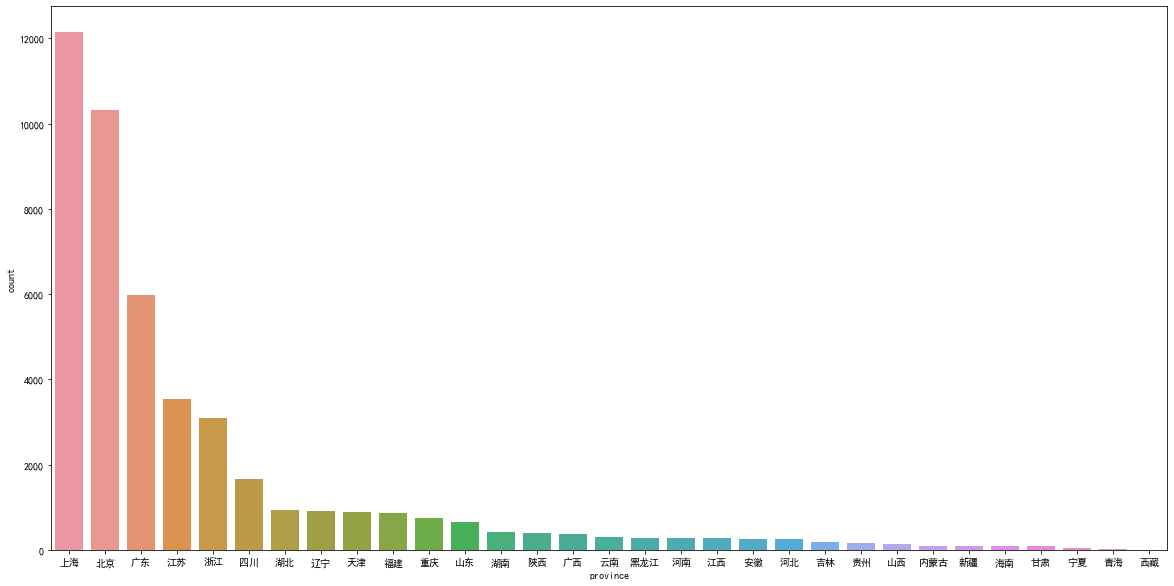

In [25]:
fig, axes = plt.subplots(figsize = (20, 10))
sns.countplot(x='province', data=user, order=user['province'].value_counts().index.tolist())
plt.show()

### 用户性别信息
用户性别工19769条数据，女性占54.7%，男性占45.3%

In [9]:
user['gender'].value_counts()/user['gender'].value_counts().sum()

女    0.54722
男    0.45278
Name: gender, dtype: float64

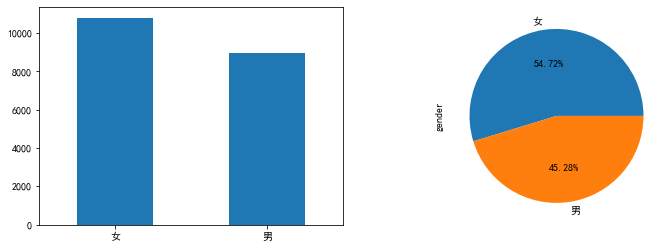

In [10]:
fig,axes = plt.subplots(1, 2, figsize=(12, 4))
user['gender'].value_counts().plot.bar(ax=axes[0])
axes[0].set_xticklabels(['女', '男'], rotation=0)
user['gender'].value_counts().plot.pie(ax=axes[1], autopct='%.2f%%')
plt.show()

### 用户年龄数据

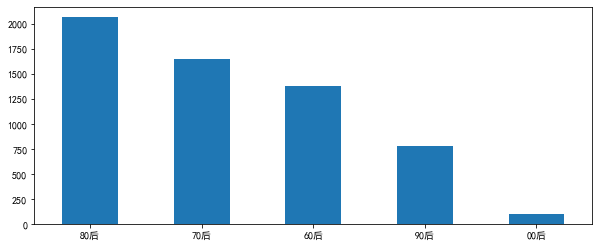

In [11]:
fig, axes = plt.subplots(figsize=(10,4))
user['age'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()
# 提供用户数据用户以60,70,80,90为主。

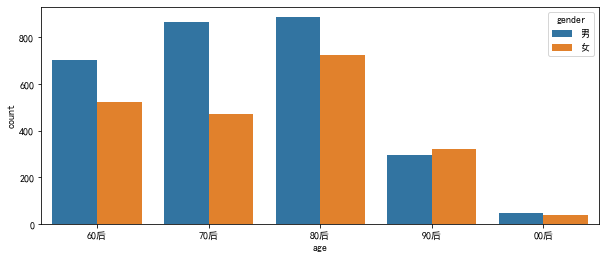

In [12]:
fig,axes = plt.subplots(figsize=(10,4))
sns.countplot(x='age', data=user, hue='gender') # 按性别分组，统计对应年龄 
plt.show()
# 虽然女性用户多于男性，但提供年龄信息的用户中，男性多于女性。女性更加不愿意暴露自己年龄。

### 用户浏览行为
行为类型一共有9个，其中1是唤醒app；2~4是浏览产品，无先后关系；5~9则是有先后关系的，从填写表单到提交订单再到最后支付。

In [13]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666060 entries, 0 to 331203
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   userid      1666060 non-null  int64
 1   actionType  1666060 non-null  int64
 2   actionTime  1666060 non-null  int64
dtypes: int64(3)
memory usage: 50.8 MB


In [14]:
action['actionType'].value_counts()

5    599224
1    479374
6    284216
3     96218
4     56899
2     56180
8     35867
7     35036
9     23046
Name: actionType, dtype: int64

In [56]:
# dataframe中转换时间格式方式1，但是这种后续画图索引不好弄，导致2016-9>2016-10。
action['actionTime'] = pd.to_datetime(action['actionTime']+8*3600, unit='s') # 将时间戳转换成对应时间格式数据，注意时区问题，unit='s'问题。 
# 提取对应时间格式
action['year'] = action['actionTime'].dt.year
action['month'] = action['actionTime'].dt.month
action['day'] = action['actionTime'].dt.day
action['date'] = action['actionTime'].dt.date
action['time'] = action['actionTime'].dt.time
#action['year_month']=action.actionTime.str[:7]
action['year_month'] = action['year'].astype(str) +'_'+ action['month'].astype(str)
action['hour'] = action['actionTime'].dt.hour

In [61]:
# 提取对应时间格式
import time
action.actionTime = action.actionTime.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [62]:
# 提取对应时间格式
action['year'] = action['actionTime'].str[:4]
action['month'] = action['actionTime'].str[5:7]
action['day'] = action['actionTime'].str[8:10]
action['date'] = action['actionTime'].str[:10]
action['time'] = action['actionTime'].str[11:]
#action['year_month']=action.actionTime.str[:7]
action['year_month'] = action['actionTime'].str[:7]
action['hour'] = action['actionTime'].str[11:13]

### 用户月访问量

In [31]:
action['year_month'].value_counts()

2017-05    315847
2017-04    284091
2017-06    255989
2017-07    193241
2017-03    115846
2017-08    114614
2016-10    102900
2017-01     60543
2016-12     57517
2016-11     54950
2017-02     53743
2017-09     29625
2016-09     27152
2016-08         2
Name: year_month, dtype: int64

In [63]:
action.drop_duplicates(subset=['userid']).groupby('year_month')['userid'].count()

year_month
2016-08       2
2016-09    2923
2016-10    5262
2016-11    2491
2016-12    2245
2017-01    1843
2017-02    1658
2017-03    5772
2017-04    9015
2017-05    8120
2017-06    4592
2017-07    3616
2017-08    2229
2017-09     615
Name: userid, dtype: int64

#### 两种方式绘制条形图

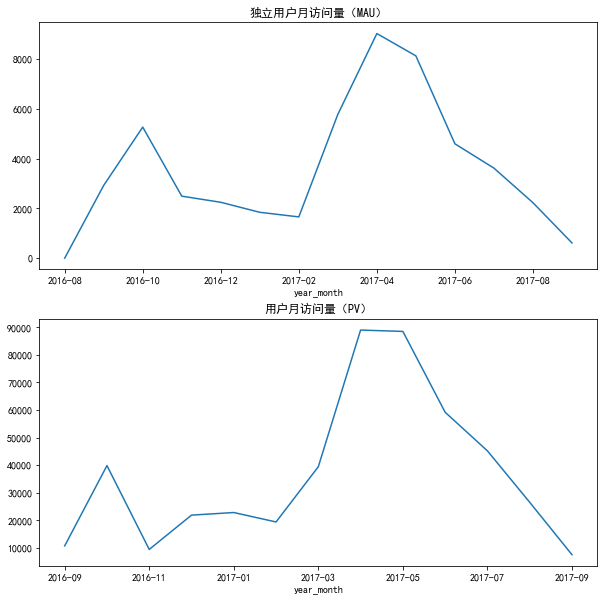

In [35]:
# MAU 月内产生用户行为的独立id数量，PV 月内用户访问app总次数
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
action.drop_duplicates(subset=['userid']).groupby('year_month')['userid'].count().plot(ax=axes[0])
axes[0].set_title('独立用户月访问量（MAU）')
action[action['actionType'] == 1].groupby('year_month')['userid'].count().plot(ax=axes[1])
axes[1].set_title('用户月访问量（PV）')
plt.show()

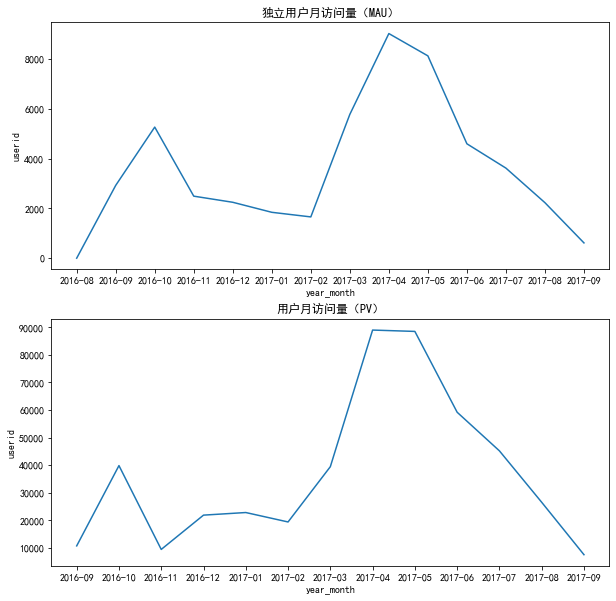

In [65]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
temp_df = pd.DataFrame(action.drop_duplicates(subset=['userid']).groupby('year_month')['userid'].count())
sns.lineplot(x=temp_df.index, y='userid', data=temp_df, ax=axes[0])
axes[0].set_title('独立用户月访问量（MAU）')

temp_df = pd.DataFrame(action[action['actionType'] == 1].groupby('year_month')['userid'].count())
sns.lineplot(x=temp_df.index, y='userid', data=temp_df, ax=axes[1])
axes[1].set_title('用户月访问量（PV）')
plt.show()

### 日访问量
DAU为日内产生用户行为的独立ID数，PV为日内行为为1的行为条数。DAU峰值出现在4月初，但同一时间段内的PV却相对PV峰值5月初较低，说明4月初平均每用户唤醒次数较低，可能是有拉新活动。对两项指标相除，可以验证以上猜想。同样的，16年12月之前用户的PV/DAU较大，之后较为平稳，APP进入健康平稳期

<Figure size 432x288 with 0 Axes>

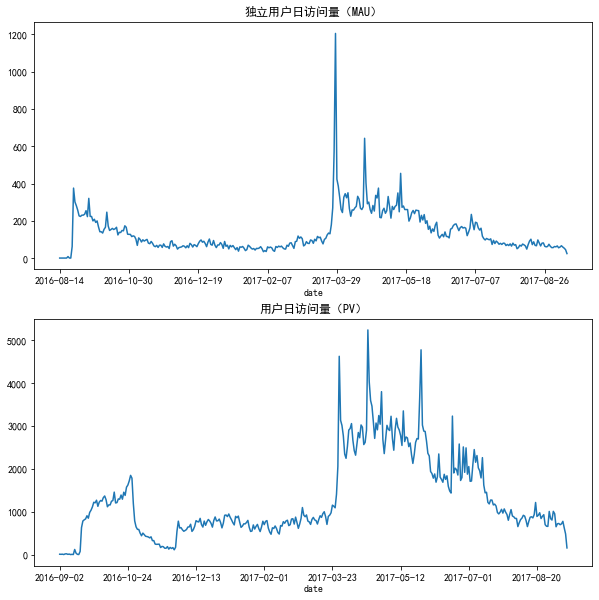

In [73]:
plt.tight_layout()
# 
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
action.drop_duplicates(subset=['userid']).groupby('date')['userid'].count().plot(ax=axes[0])
axes[0].set_title('独立用户日访问量（DAU）')
action[action['actionType'] == 1].groupby('date')['userid'].count().plot(ax=axes[1])
axes[1].set_title('用户日访问量（PV）')
plt.show()

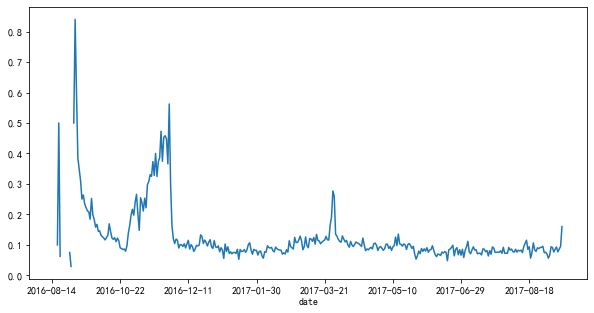

In [75]:
fig,axes = plt.subplots(figsize=(10,5))
(action.drop_duplicates(['userid']).groupby('date').userid.count()/action[action['actionType']==1].groupby('date').userid.count()).plot()
plt.show()